# Exploratory Data Analysis

In [6]:
pip install pandas matplotlib seaborn numpy openpyxl

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 250 kB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_excel('../data/flood_dataset_raw.xlsx')


## 1. Data overview 

In [8]:
print("Dataset shape:", df.shape)

Dataset shape: (115, 11)


In [9]:
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [10]:
df.describe()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


In [12]:
df.isnull().sum()

Temp           0
Humidity       0
Cloud Cover    0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
avgjune        0
sub            0
flood          0
dtype: int64

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
 11  check_sum    115 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 10.9 KB
None


## 2. Target Variable Distribution

/var/folders/hh/9b0n0d9d09v956ffm3slpjjh0000gn/T/ipykernel_99963/2199203222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='flood', data=df, palette='Set2')


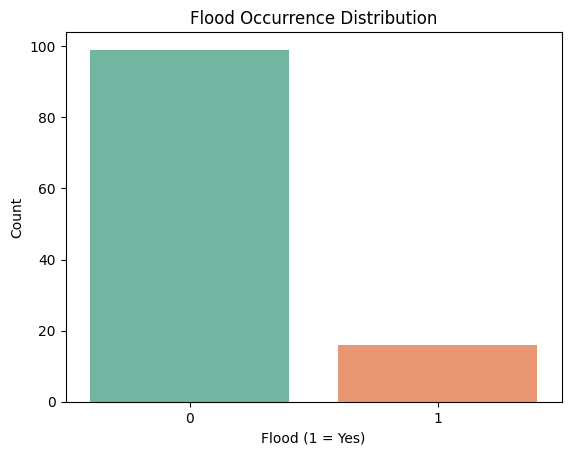

Flood rate: 13.91%


In [13]:
sns.countplot(x='flood', data=df, palette='Set2')
plt.title("Flood Occurrence Distribution")
plt.xlabel("Flood (1 = Yes)")
plt.ylabel("Count")
plt.show()

# Flood rate
flood_rate = df['flood'].mean()
print(f"Flood rate: {flood_rate*100:.2f}%")

## 3. Univariate Analysis - Distribution of Key Features

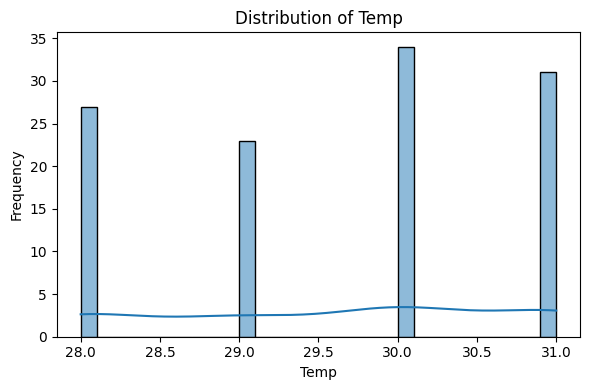

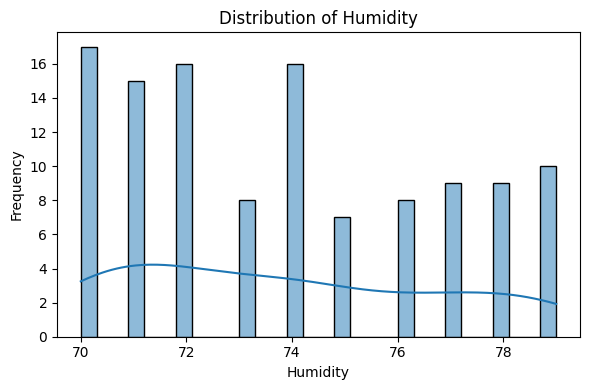

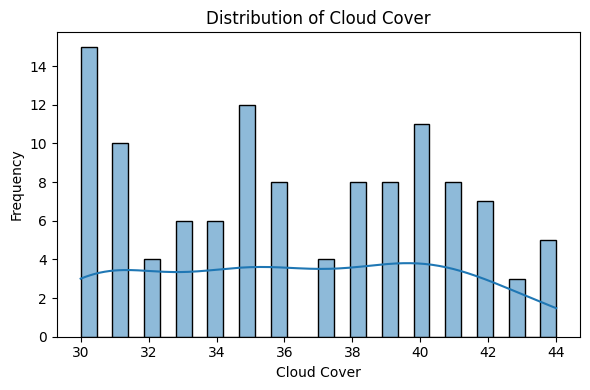

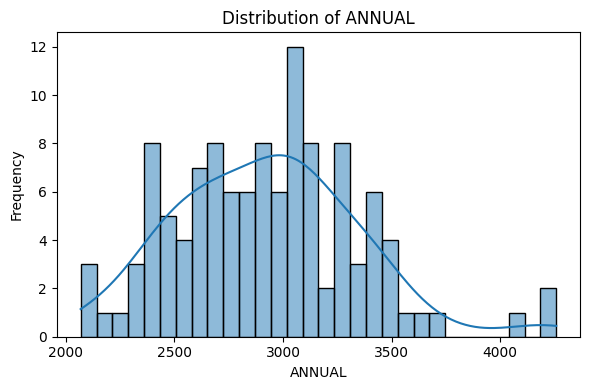

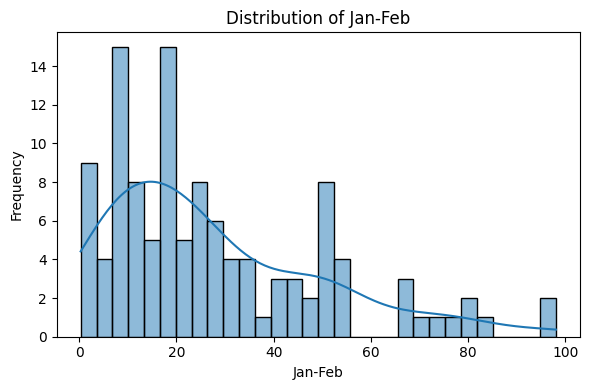

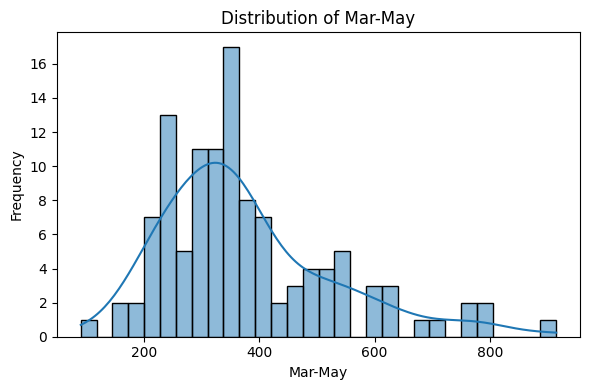

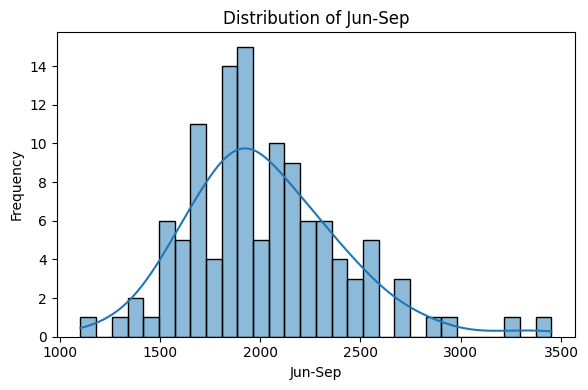

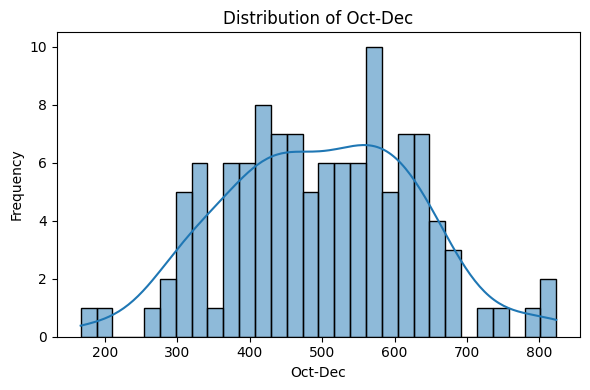

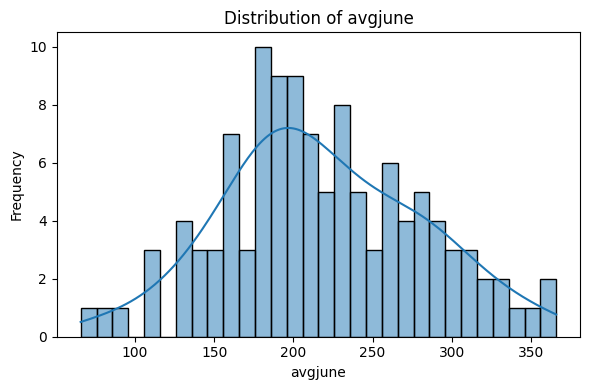

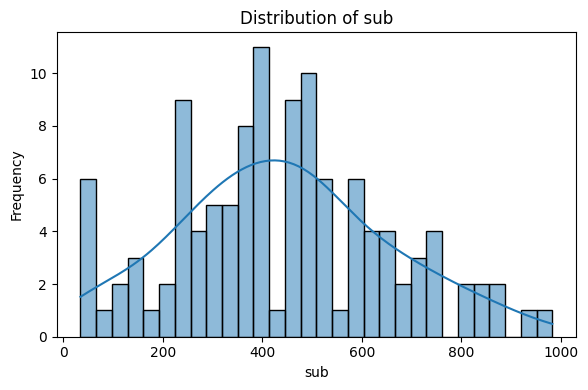

In [18]:
numerical_cols = [
    'Temp', 'Humidity', 'Cloud Cover', 'ANNUAL',
    'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec',
    'avgjune', 'sub'
]
#Annual is the sum of seasonal rainfalls in mm

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## 4. Boxplot for Outliers

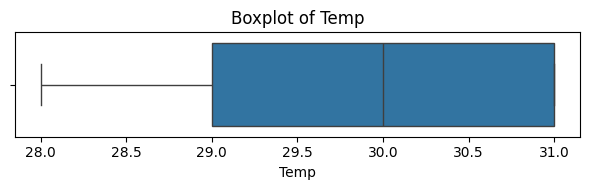

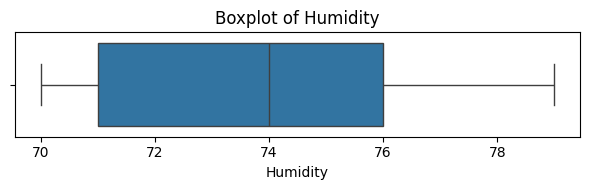

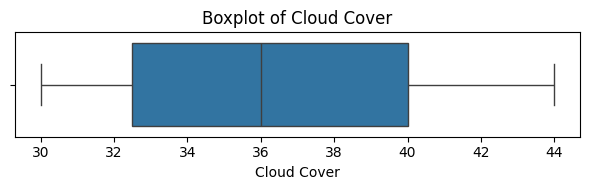

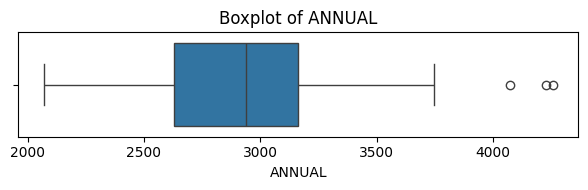

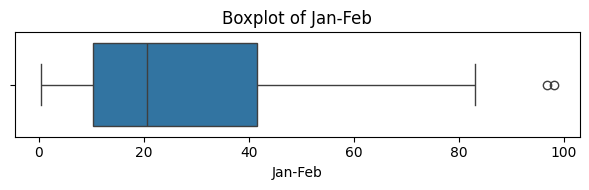

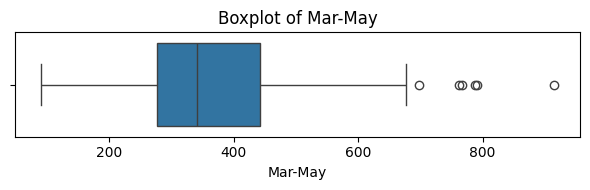

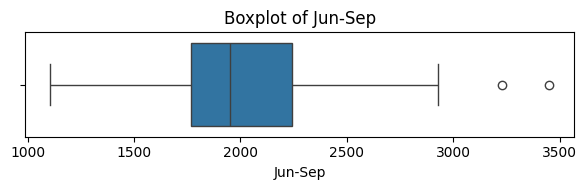

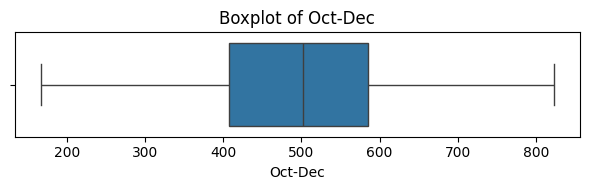

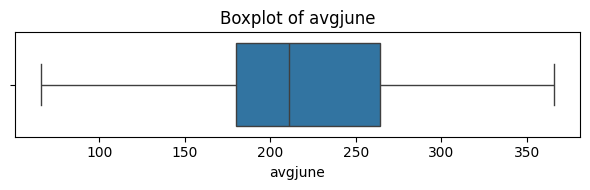

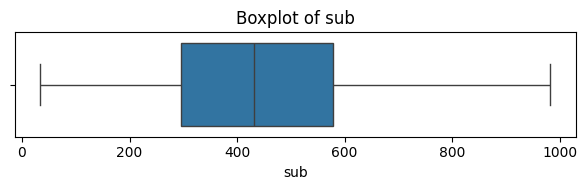

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


## 5. Seasonal Rainfall vs Flood Occurrence

Our aim is to explore if specific seasons have a strong correlation with floods.

/var/folders/hh/9b0n0d9d09v956ffm3slpjjh0000gn/T/ipykernel_99963/1453936330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flood', y=col, data=df, palette='Set3')


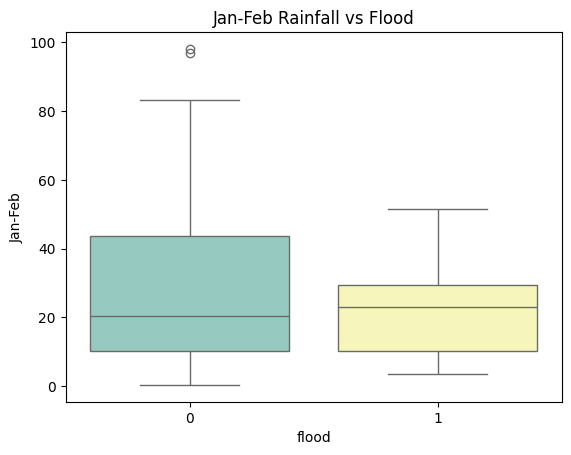

/var/folders/hh/9b0n0d9d09v956ffm3slpjjh0000gn/T/ipykernel_99963/1453936330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flood', y=col, data=df, palette='Set3')


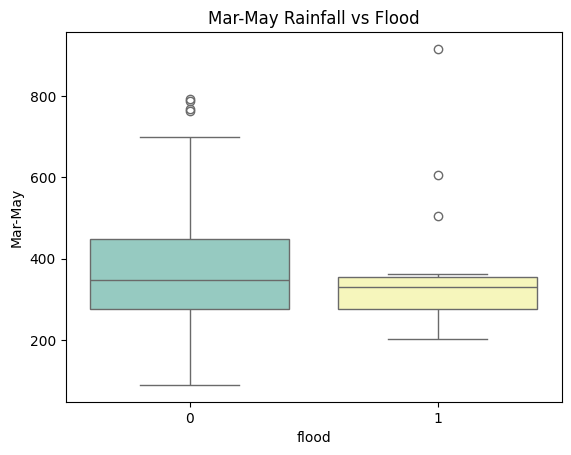

/var/folders/hh/9b0n0d9d09v956ffm3slpjjh0000gn/T/ipykernel_99963/1453936330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flood', y=col, data=df, palette='Set3')


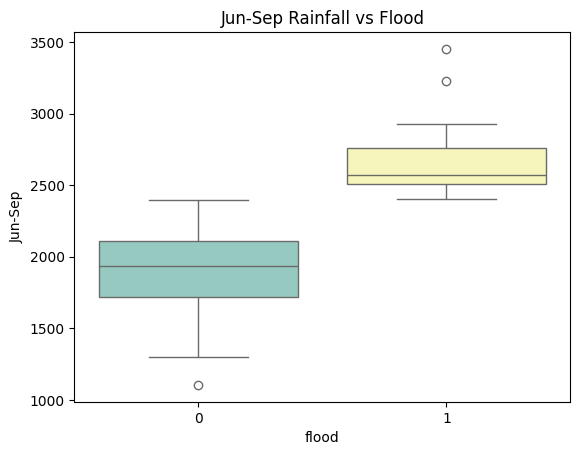

/var/folders/hh/9b0n0d9d09v956ffm3slpjjh0000gn/T/ipykernel_99963/1453936330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flood', y=col, data=df, palette='Set3')


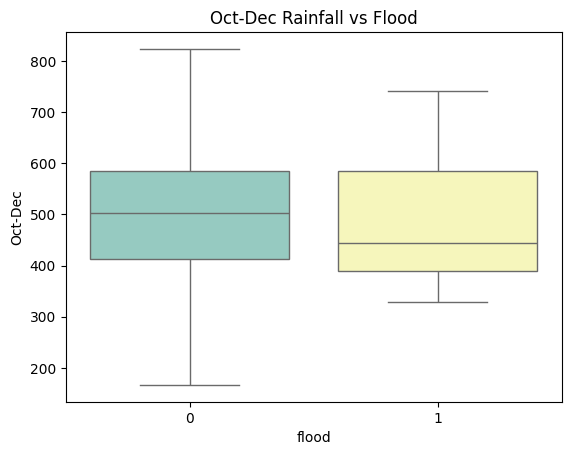

In [21]:
season_cols = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

for col in season_cols:
    sns.boxplot(x='flood', y=col, data=df, palette='Set3')
    plt.title(f"{col} Rainfall vs Flood")
    plt.show()


## 6. Multivariate Analysis

To check which features are most correlated with each other and with the target (flood).

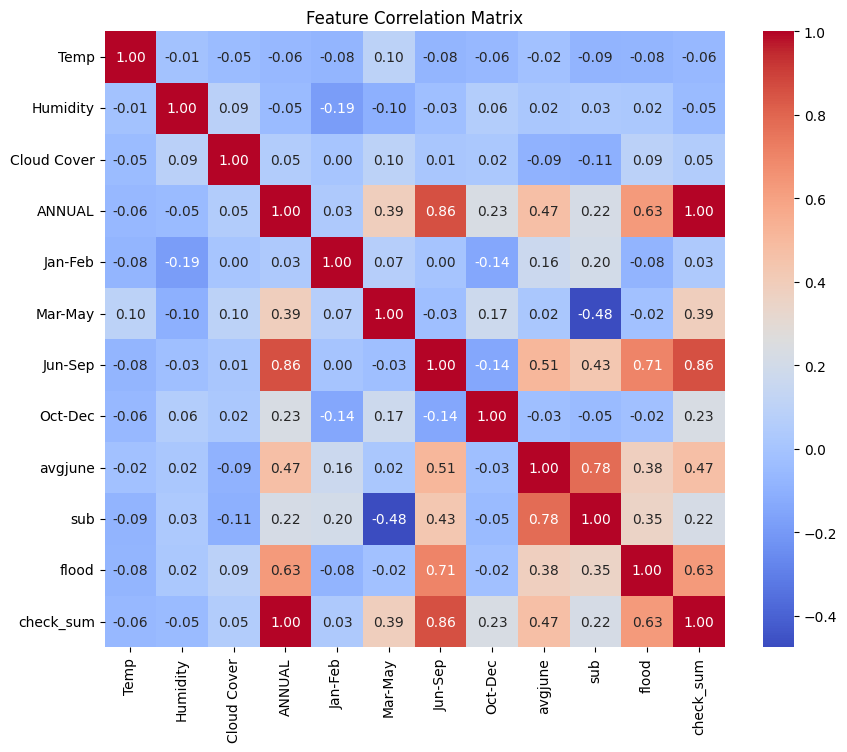

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


## 7. Average Rainfall in Flood vs Non-Flood Years

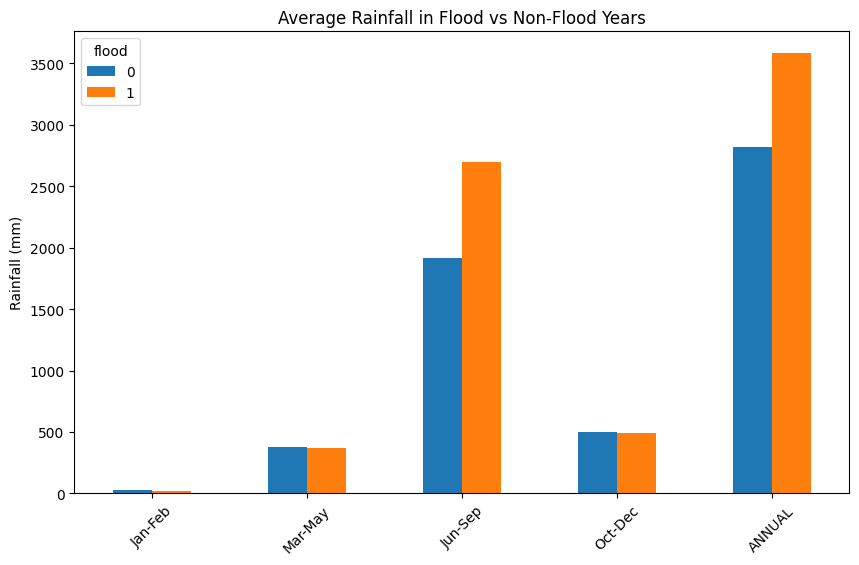

In [23]:
df_grouped = df.groupby('flood')[season_cols + ['ANNUAL']].mean().T
df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title("Average Rainfall in Flood vs Non-Flood Years")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()
